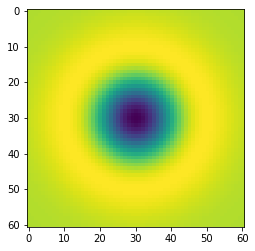

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X , Y = np.meshgrid(np.arange(-hw , hw + 1 , 1) , np.arange(-hw , hw + 1 , 1))
log = 1/(2 * np.pi * sigma ** 2) * (X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

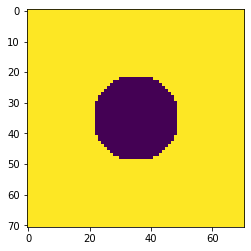

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w , h = 71 , 71
hw , hh = w//2 , h//2
f = np.ones((h,w) , dtype = np.float32)*255

X , Y = np.meshgrid(np.arange(-hh , hh + 1 , 1) , np.arange(-hw , hw + 1 , 1))

r = w//5
f *= X**2 + Y**2 >= r**2

plt.imshow(f)
plt.show()


(35, 35, 5)
10


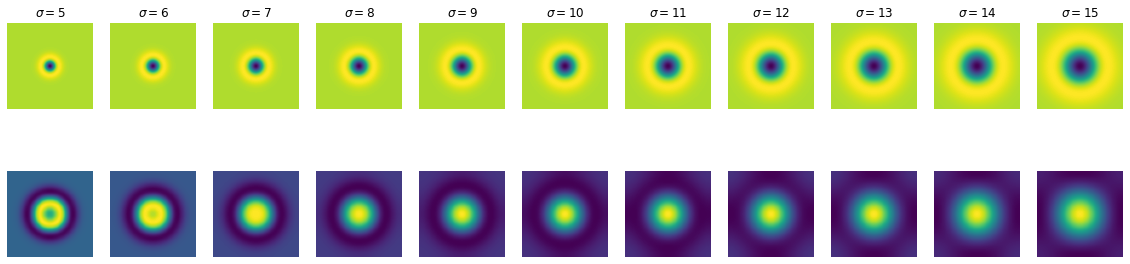

In [22]:
s = 11
fig , ax = plt.subplots(2 , s , figsize = (20 , 5))
scale_space = np.empty((h , w , s) , dtype = np.float32)
sigmas = np.arange(5 , 16 , 1)
for i , sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X , Y = np.meshgrid(np.arange(-log_hw , log_hw + 1 , 1) , np.arange(-log_hw , log_hw + 1 , 1))
    log = 1/(2 * np.pi * sigma ** 2) * (X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f , -1 , log)
    scale_space[: , : , i] = f_log
    ax[0 , i].imshow(log)
    ax[0 , i].axis('off')
    ax[0 , i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1 , i].imshow(f_log)
    ax[1 , i].axis('off')

indices = np.unravel_index(np.argmax(scale_space , axis = None) , scale_space.shape)
print(indices)
print(sigmas[indices[2]])

The output given in the code and the calculated sigma value are the same.

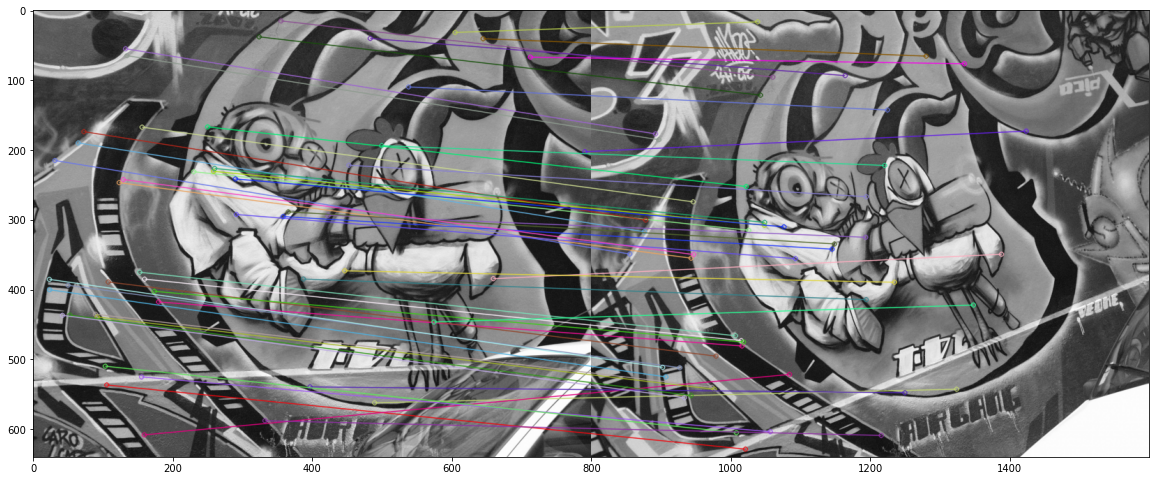

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread(r"images/img1.ppm",cv.IMREAD_GRAYSCALE)  
assert img1 is not None
img2 = cv.imread("images/img2.ppm",cv.IMREAD_GRAYSCALE) 
assert img2 is not None

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.subplots(figsize=(20,20))
plt.imshow(img3)
plt.show()

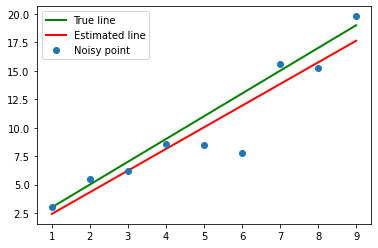

In [39]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

m = 2
c = 1
x = np.arange(1 , 10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n , 1) , np.ones((n , 1))] , axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]


plt.plot([x[0] , x[-1]] , [m*x[0] + c , m*x[-1] + c] , color = 'g' , linewidth = 2 , label = 'True line')
plt.plot([x[0] , x[-1]] , [mstar*x[0] + cstar , mstar*x[-1] + cstar] , color = 'r' , linewidth = 2 , label = 'Estimated line')
plt.plot(x , y , 'o' , label = 'Noisy point')
plt.legend()

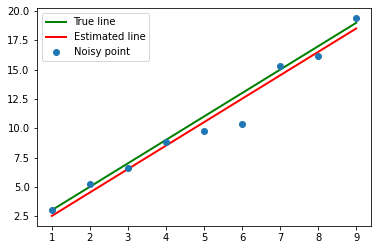

In [40]:
import numpy as np
import matplotlib.pyplot as plt

m = 2
c = 1
x = np.arange(1 , 10 , 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-1] = 20
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x)) ** 2)
u12 = np.sum((x - np.mean(x)) * (y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y)) ** 2)

U = np.array([[u11 , u12] , [u21 , u22]])
W , V = np.linalg.eig(U)

ev_corresponding_to_smallest_ev = V[: , np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a * np.mean(x) + b * np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot([x[0] , x[-1]] , [m*x[0] + c , m*x[-1] + c] , color = 'g' , linewidth = 2 , label = 'True line')
plt.plot([x[0] , x[-1]] , [mstar*x[0] + cstar , mstar*x[-1] + cstar] , color = 'r' , linewidth = 2 , label = 'Estimated line')
plt.plot(x , y , 'o' , label = 'Noisy point')
plt.legend()